In [17]:
from __future__ import print_function
import requests as rq
import time, os
import matplotlib.image as pli
import matplotlib.pyplot as plt
ip=!ifconfig eth0 | grep -Po 'inet \K([\d\.]+)'
ip=ip[0]
from IPython.core.display import HTML as H

#HTML('<img src="http://%s:3000/video/0">'%ip)
#HTML('<img width="320" src="http://%s:3000/move/left/20/100?%d">'%(ip,int(time.time()*10)))

In [25]:
# take a snapshot
def snap(i,  pref):
    url = "http://%s:3000/move/left/20/100?%d"%(ip,int(time.time()*10))
    r = rq.get(url)
    file = "%s-%d.jpg"%(pref,i)
    content = r.content
    with open(file, "wb") as f:
        f.write(content)
    return file
#snap(0, "tmp/snap")
#for i in range(25): snap(i, "tmp/test")

In [40]:
# move to destination
def move(pref, dir, tot, n,m):
    os.makedirs("%s/ok"%dir, 0o755, exist_ok=True)
    os.makedirs("%s/ko"%dir, 0o755, exist_ok=True)
    count = int(time.time()*1000)
    for i in range(0,tot):
        src = "%s-%d.jpg" % (pref,i)
        label = "ok" if i >= n and i <= m else "ko"    
        tgt = "%s/%s/%d.jpg" % (dir, label, count)
        count += 1
        print("mv %s %s", src,tgt)
        try: os.rename(src,tgt)
        except: print("not found", src)
#move(pref, "data", 25, 9, 17)

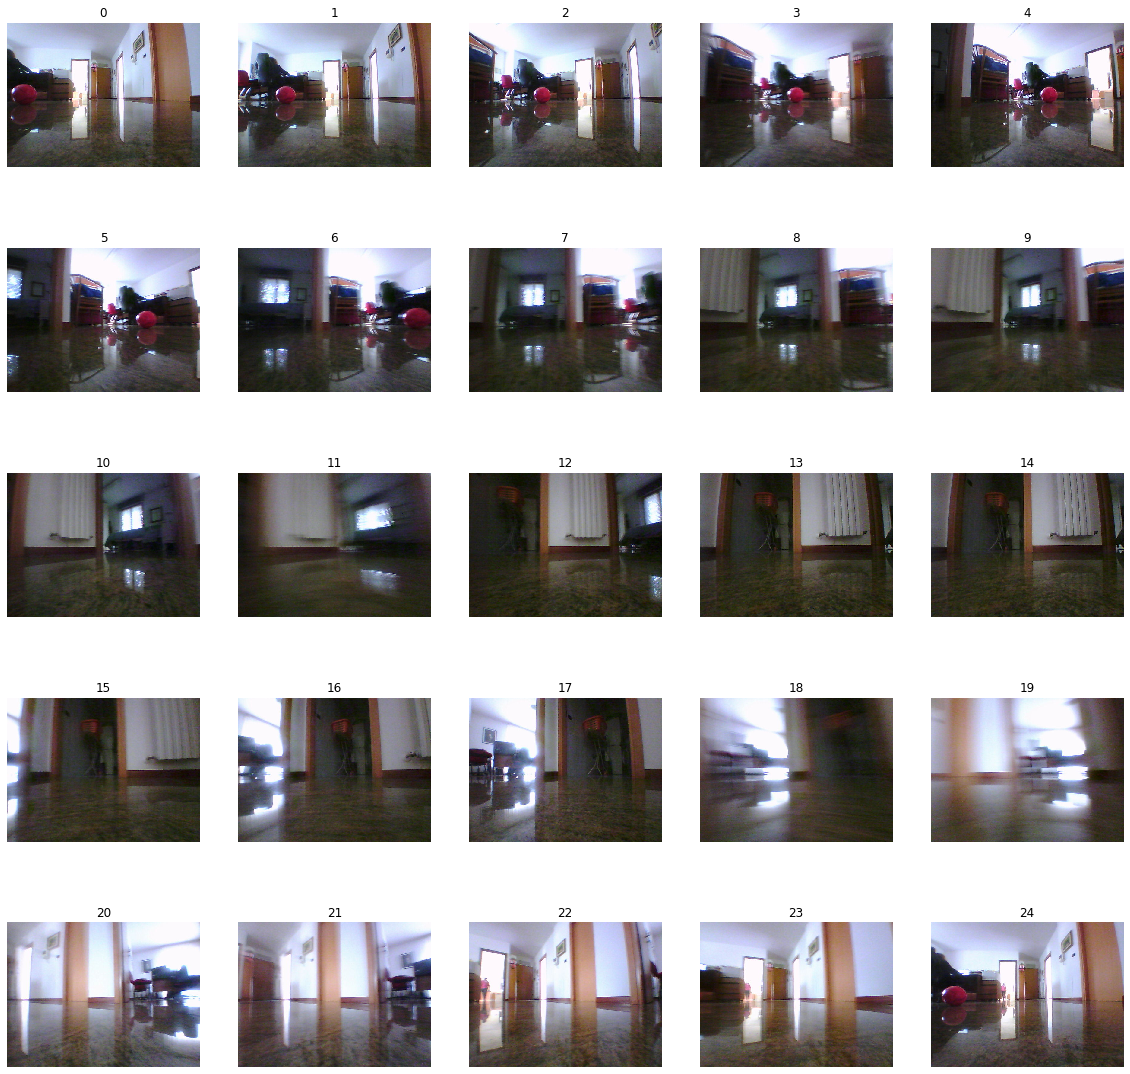

In [77]:
# take snapshot spinning
pref = "tmp/snap"
os.makedirs("tmp", 0x755, exist_ok=True)

nr = 5
nc = 5

fig = plt.gcf()
fig.set_size_inches(nc*4, nr*4)

for i in range(0, nr*nc):
    file = snap(i, "tmp/snap")
    #file = "%s-%d.jpg"%(pref,i)
    #print(file)
    img = pli.imread(file)
    plt.subplot(nr,nc,i+1).axis('Off')
    plt.title("%s"%i)
    plt.imshow(img)

In [78]:
# move to dest
move(pref, "test", 25,0,6)

mv %s %s tmp/snap-0.jpg test/ok/1574331547037.jpg
mv %s %s tmp/snap-1.jpg test/ok/1574331547038.jpg
mv %s %s tmp/snap-2.jpg test/ok/1574331547039.jpg
mv %s %s tmp/snap-3.jpg test/ok/1574331547040.jpg
mv %s %s tmp/snap-4.jpg test/ok/1574331547041.jpg
mv %s %s tmp/snap-5.jpg test/ok/1574331547042.jpg
mv %s %s tmp/snap-6.jpg test/ok/1574331547043.jpg
mv %s %s tmp/snap-7.jpg test/ko/1574331547044.jpg
mv %s %s tmp/snap-8.jpg test/ko/1574331547045.jpg
mv %s %s tmp/snap-9.jpg test/ko/1574331547046.jpg
mv %s %s tmp/snap-10.jpg test/ko/1574331547047.jpg
mv %s %s tmp/snap-11.jpg test/ko/1574331547048.jpg
mv %s %s tmp/snap-12.jpg test/ko/1574331547049.jpg
mv %s %s tmp/snap-13.jpg test/ko/1574331547050.jpg
mv %s %s tmp/snap-14.jpg test/ko/1574331547051.jpg
mv %s %s tmp/snap-15.jpg test/ko/1574331547052.jpg
mv %s %s tmp/snap-16.jpg test/ko/1574331547053.jpg
mv %s %s tmp/snap-17.jpg test/ko/1574331547054.jpg
mv %s %s tmp/snap-18.jpg test/ko/1574331547055.jpg
mv %s %s tmp/snap-19.jpg test/ko/15743315

In [29]:
n = 0
dir = "data/ok"
file = os.listdir(dir)[n]
H(f"<img src='{dir}/{file}'>")